# COVID-19 & MLAI      

__This notebook is the solution to my Idea on Covid-19 & Machine Learning in #CODE19 Hackathon__

The coronavirus is a family of viruses that can cause a range of illnesses in humans including common cold and more severe forms like SARS and MERS which are life-threatening. The virus is named after its shape which takes the form of a crown with protrusions around it and hence is known as coronavirus.

COVID-19 symptoms range from mild to severe. It takes 2-14 days after exposure for symptoms to develop. Symptoms may include:

 - fever
 - cough
 - shortness of breath
 
<div class="alert alert-block alert-info">
<b>Note:</b> Those with weakened immune systems may develop more serious symptoms, like pneumonia or bronchitis. You may never develop symptoms after being exposed to COVID-19. So far, most confirmed cases are in adults, but some children have been infected. There is no evidence that children are at greater risk for getting the virus.
</div>

<font color='red'><h1 align="center">STAY HOME STAY SAFE !</h1></font>

![title](coverpic4.png)

# Let's Begin !!

***

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings("ignore")
sns.set_style("darkgrid") # possible values: dark, darkgrid, white, whitegrid, ticks

### Loading Dataset 

In [2]:
covid19_test_per_million_df = pd.read_csv("covid19-tests-per-million-people.csv")

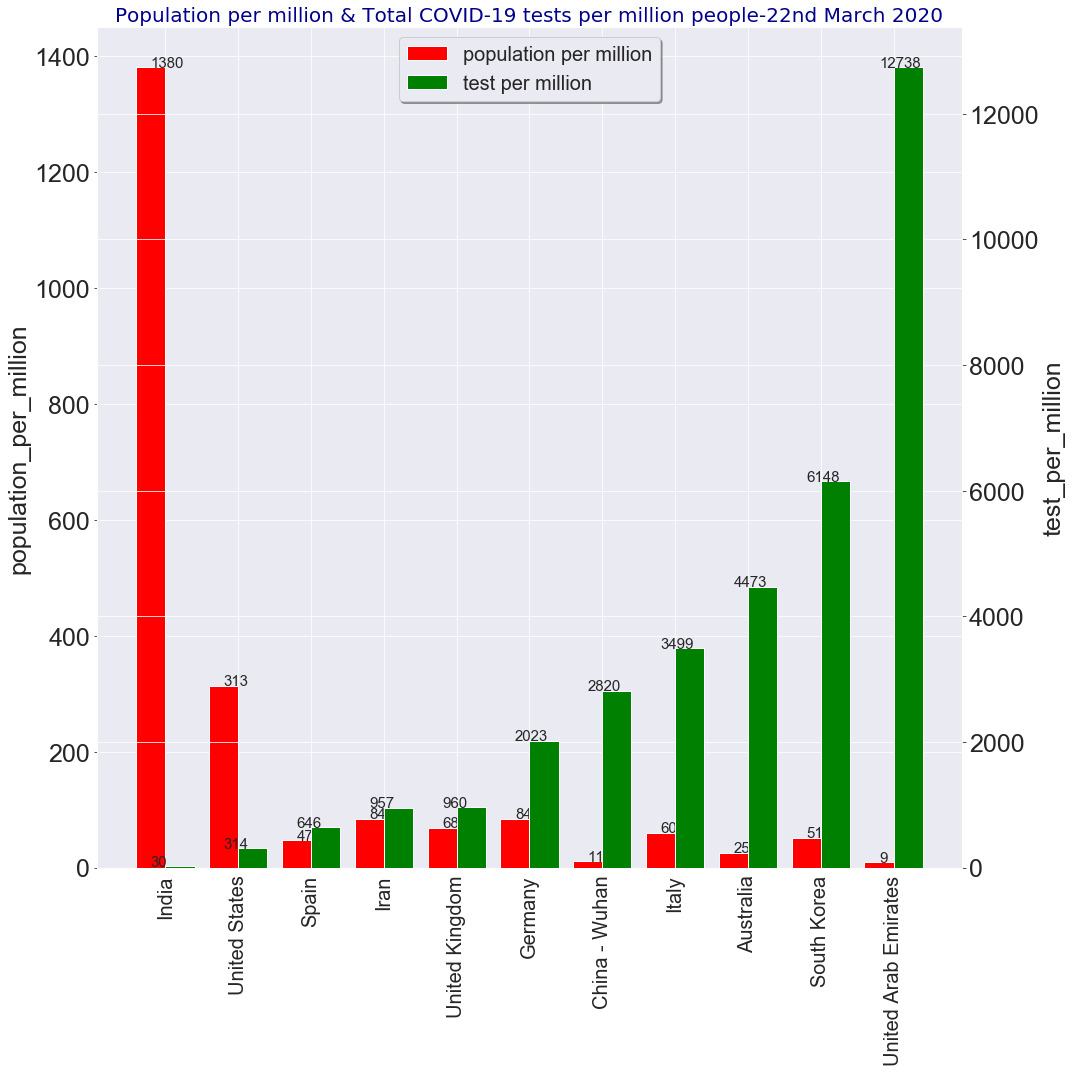

In [367]:
f, ax1 = plt.subplots(1, 1, figsize = (15, 15))
x = np.arange(11)
w = 0.4
plt.xticks(x + w /2, ["India", "United States", "Spain", "Iran", "United Kingdom", "Germany", "China - Wuhan", "Italy", "Australia", "South Korea", "United Arab Emirates"], \
           rotation="vertical", fontsize = 20)

pop =ax1.bar(x, [1380, 313, 47, 84, 68, 84, 11, 60, 25, 51, 9], width=w, color="r", align="center")
for index,data in enumerate([1380, 313, 47, 84, 68, 84, 11, 60, 25, 51, 9]):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.yticks(fontsize = 25)
ax1.set_ylabel("population_per_million", fontsize=25)

ax2 = ax1.twinx()

gdp =ax2.bar(x + w, [30, 314, 646, 957, 960, 2023, 2820, 3499, 4473, 6148, 12738], width=w,color="g", align="center")
for index,data in enumerate([30, 314, 646, 957, 960, 2023, 2820, 3499, 4473, 6148, 12738]):
    plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=15))
plt.yticks(fontsize = 25)

plt.title("Population per million & Total COVID-19 tests per million people-22nd March 2020", \
        fontsize = 20, fontname = "Console", color = "DarkBlue")
plt.legend([pop, gdp], ["population per million", "test per million"], frameon = True, fancybox = True, shadow = True, prop = {"size": 20}, \
           loc="upper center")
plt.xlabel("country", fontsize=25)
plt.ylabel("test_per_million", fontsize=25)
plt.tight_layout()
plt.show()

## Importing the Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

import pdb
import time
import math
import random
import warnings
from tqdm import tqdm
from prettytable import PrettyTable

random.seed(50)
warnings.filterwarnings("ignore")

In [5]:
covid19_df = pd.read_csv("COVID-19_crunch.csv", engine="python")
covid19_df

,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,travel_history_dates,travel_history_location,outcome,date_death_or_discharge
0,30,male,18.01.2020,20.01.2020,22.01.2020,NaN,17.01.2020,Wuhan,NaN,NaN
1,47,male,10.01.2020,21.01.2020,23.01.2020,NaN,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN
2,49,male,15.01.2020,20.01.2020,23.01.2020,NaN,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN
3,47,female,17.01.2020,20.01.2020,23.01.2020,NaN,NaN,NaN,NaN,NaN
4,50,female,10.01.2020,21.01.2020,23.01.2020,NaN,07.01.2020,Wuhan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13169,60-69,male,27.02.2020,NaN,28.02.2020,fever (38 ° C),NaN,#207,NaN,NaN
13170,40-49,female,19.02.2020,NaN,28.02.2020,fever (38 ° C),NaN,#208,NaN,NaN
13171,0-10,female,NaN,NaN,28.02.2020,NaN,NaN,#209,NaN,NaN
13172,NaN,female,NaN,NaN,28.02.2020,mild,NaN,returned from Italy this week,NaN,NaN


## Data cleaning

In [6]:
covid19_df.isna().sum() 

age                        11825
sex                        11910
date_onset_symptoms        12428
date_admission_hospital    12444
date_confirmation             85
symptoms                   12681
travel_history_dates       12671
travel_history_location    12416
outcome                    12990
date_death_or_discharge    13081
dtype: int64

In [7]:
covid19_dropna_df = covid19_df.dropna(subset=["age", "sex", "symptoms"], how="any")
covid19_dropna_df

,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,travel_history_dates,travel_history_location,outcome,date_death_or_discharge
6,42,female,21.01.2020,21.01.2020,22.01.2020,fever,19.01.2020,Wuhan,NaN,NaN
8,59,female,19.01.2020,24.01.2020,26.01.2020,fever,22.01.2020,Wuhan,NaN,NaN
13,38,female,22.01.2020,22.01.2020,23.01.2020,cough,19.01.2020,Wuhan,NaN,NaN
14,45,male,21.01.2020,21.01.2020,27.01.2020,fever,19.01.2020,Wuhan,NaN,NaN
17,33,female,NaN,20.01.2020,22.01.2020,fever,18.01.2020,Wuhan,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
13164,70-79,male,20.02.2020,NaN,28.02.2020,fever (37.5 ? ? 38.0 ?),NaN,#203/Hokkaido 63,NaN,NaN
13166,60-69,female,20.02.2020,NaN,28.02.2020,fever and cough,NaN,#205/Hokkaido 65,NaN,NaN
13167,60-69,male,18.02.2020,28.02.2020,28.02.2020,fever,NaN,#206/Hokkaido 66,NaN,NaN
13169,60-69,male,27.02.2020,NaN,28.02.2020,fever (38 ° C),NaN,#207,NaN,NaN


In [8]:
covid19_dropna_df.drop(columns = ["outcome", "date_death_or_discharge"], inplace = True)
covid19_dropna_df.shape

(474, 8)

In [9]:
covid19_dropna_df.sample(n=5)

,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,travel_history_dates,travel_history_location
1664,34,female,23.01.2020,NaN,27.01.2020,fever,NaN,NaN
10646,16,female,NaN,05.02.2020,10.02.2020,"abdominal pain, pulmonary inflammation",21.01.2020,Wuhan
8613,26,female,01.02.2020,04.02.2020,05.02.2020,"fever, cough",21.01.2020,Thailand
11499,80-89,male,03.02.2020,NaN,22.02.2020,difficulty breathing,NaN,NaN
5987,65,male,04.02.2020,05.02.2020,07.02.2020,"fever, myalgia",NaN,NaN


In [10]:
covid19_dropna_df.reset_index(level = None, drop = False, inplace = True)

In [11]:
covid19_dropna_df.drop(columns = ["index"], inplace = True)
covid19_dropna_df

,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,travel_history_dates,travel_history_location
0,42,female,21.01.2020,21.01.2020,22.01.2020,fever,19.01.2020,Wuhan
1,59,female,19.01.2020,24.01.2020,26.01.2020,fever,22.01.2020,Wuhan
2,38,female,22.01.2020,22.01.2020,23.01.2020,cough,19.01.2020,Wuhan
3,45,male,21.01.2020,21.01.2020,27.01.2020,fever,19.01.2020,Wuhan
4,33,female,NaN,20.01.2020,22.01.2020,fever,18.01.2020,Wuhan
...,...,...,...,...,...,...,...,...
469,70-79,male,20.02.2020,NaN,28.02.2020,fever (37.5 ? ? 38.0 ?),NaN,#203/Hokkaido 63
470,60-69,female,20.02.2020,NaN,28.02.2020,fever and cough,NaN,#205/Hokkaido 65
471,60-69,male,18.02.2020,28.02.2020,28.02.2020,fever,NaN,#206/Hokkaido 66
472,60-69,male,27.02.2020,NaN,28.02.2020,fever (38 ° C),NaN,#207


In [12]:
covid19_dropna_df.insert(8, "travel_history", None, True)
covid19_dropna_df

,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,travel_history_dates,travel_history_location,travel_history
0,42,female,21.01.2020,21.01.2020,22.01.2020,fever,19.01.2020,Wuhan,None
1,59,female,19.01.2020,24.01.2020,26.01.2020,fever,22.01.2020,Wuhan,None
2,38,female,22.01.2020,22.01.2020,23.01.2020,cough,19.01.2020,Wuhan,None
3,45,male,21.01.2020,21.01.2020,27.01.2020,fever,19.01.2020,Wuhan,None
4,33,female,NaN,20.01.2020,22.01.2020,fever,18.01.2020,Wuhan,None
...,...,...,...,...,...,...,...,...,...
469,70-79,male,20.02.2020,NaN,28.02.2020,fever (37.5 ? ? 38.0 ?),NaN,#203/Hokkaido 63,None
470,60-69,female,20.02.2020,NaN,28.02.2020,fever and cough,NaN,#205/Hokkaido 65,None
471,60-69,male,18.02.2020,28.02.2020,28.02.2020,fever,NaN,#206/Hokkaido 66,None
472,60-69,male,27.02.2020,NaN,28.02.2020,fever (38 ° C),NaN,#207,None


In [13]:
covid19_dropna_df.insert(6, "days_past_onset_symptoms", None, True)
covid19_dropna_df

,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,days_past_onset_symptoms,travel_history_dates,travel_history_location,travel_history
0,42,female,21.01.2020,21.01.2020,22.01.2020,fever,None,19.01.2020,Wuhan,None
1,59,female,19.01.2020,24.01.2020,26.01.2020,fever,None,22.01.2020,Wuhan,None
2,38,female,22.01.2020,22.01.2020,23.01.2020,cough,None,19.01.2020,Wuhan,None
3,45,male,21.01.2020,21.01.2020,27.01.2020,fever,None,19.01.2020,Wuhan,None
4,33,female,NaN,20.01.2020,22.01.2020,fever,None,18.01.2020,Wuhan,None
...,...,...,...,...,...,...,...,...,...,...
469,70-79,male,20.02.2020,NaN,28.02.2020,fever (37.5 ? ? 38.0 ?),None,NaN,#203/Hokkaido 63,None
470,60-69,female,20.02.2020,NaN,28.02.2020,fever and cough,None,NaN,#205/Hokkaido 65,None
471,60-69,male,18.02.2020,28.02.2020,28.02.2020,fever,None,NaN,#206/Hokkaido 66,None
472,60-69,male,27.02.2020,NaN,28.02.2020,fever (38 ° C),None,NaN,#207,None


In [14]:
covid19_dropna_df

,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,days_past_onset_symptoms,travel_history_dates,travel_history_location,travel_history
0,42,female,21.01.2020,21.01.2020,22.01.2020,fever,None,19.01.2020,Wuhan,None
1,59,female,19.01.2020,24.01.2020,26.01.2020,fever,None,22.01.2020,Wuhan,None
2,38,female,22.01.2020,22.01.2020,23.01.2020,cough,None,19.01.2020,Wuhan,None
3,45,male,21.01.2020,21.01.2020,27.01.2020,fever,None,19.01.2020,Wuhan,None
4,33,female,NaN,20.01.2020,22.01.2020,fever,None,18.01.2020,Wuhan,None
...,...,...,...,...,...,...,...,...,...,...
469,70-79,male,20.02.2020,NaN,28.02.2020,fever (37.5 ? ? 38.0 ?),None,NaN,#203/Hokkaido 63,None
470,60-69,female,20.02.2020,NaN,28.02.2020,fever and cough,None,NaN,#205/Hokkaido 65,None
471,60-69,male,18.02.2020,28.02.2020,28.02.2020,fever,None,NaN,#206/Hokkaido 66,None
472,60-69,male,27.02.2020,NaN,28.02.2020,fever (38 ° C),None,NaN,#207,None


In [15]:
import re
import statistics
covid19_main_df = covid19_dropna_df.copy()
days_onset_list = []
for i in range(len(covid19_main_df)): 
    # age
    if("-" in covid19_main_df.loc[i, "age"]):
        covid19_main_df.loc[i, "age"] = str(math.ceil((int(covid19_main_df.loc[i, "age"].split("-")[0]) + int(covid19_main_df.loc[i, "age"].split("-")[1]))/2))
    
    # symptoms 
    covid19_main_df.loc[i, "symptoms"] = re.sub(r" ?\([^)]+\)", "",  covid19_main_df.loc[i, "symptoms"]) 
    covid19_main_df.loc[i, "symptoms"] = ''.join([i for i in covid19_main_df.loc[i, "symptoms"]  if not i.isdigit()]) 
    covid19_main_df.loc[i, "symptoms"]  = covid19_main_df.loc[i, "symptoms"] .replace("°C", "")
    covid19_main_df.loc[i, "symptoms"]  = covid19_main_df.loc[i, "symptoms"] .replace(".?", "")
    covid19_main_df.loc[i, "symptoms"]  = covid19_main_df.loc[i, "symptoms"] .replace("?", "")
    
    # days symptoms
    if((covid19_main_df.loc[i, "date_onset_symptoms"] == covid19_main_df.loc[i, "date_onset_symptoms"]) & (covid19_main_df.loc[i, "date_confirmation"] == covid19_main_df.loc[i, "date_confirmation"])):
        covid19_main_df.loc[i, "days_past_onset_symptoms"] = abs(int(covid19_main_df.loc[i, "date_confirmation"].split(".")[0]) - int(covid19_main_df.loc[i, "date_onset_symptoms"].split(".")[0]))        
        days_onset_list.append(covid19_main_df.loc[i, "days_past_onset_symptoms"])
    
    # travel_history
    if ((covid19_main_df.loc[i, "travel_history_dates"] != covid19_main_df.loc[i, "travel_history_dates"]) & (covid19_main_df.loc[i, "travel_history_location"] != covid19_main_df.loc[i, "travel_history_location"])):
        covid19_main_df.loc[i, "travel_history"] = 0
    else:
        covid19_main_df.loc[i, "travel_history"] = 1
covid19_main_df["days_past_onset_symptoms"][covid19_main_df["days_past_onset_symptoms"] != covid19_main_df["days_past_onset_symptoms"]] = statistics.median(days_onset_list) 
covid19_main_df    

,age,sex,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,days_past_onset_symptoms,travel_history_dates,travel_history_location,travel_history
0,42,female,21.01.2020,21.01.2020,22.01.2020,fever,1,19.01.2020,Wuhan,1
1,59,female,19.01.2020,24.01.2020,26.01.2020,fever,7,22.01.2020,Wuhan,1
2,38,female,22.01.2020,22.01.2020,23.01.2020,cough,1,19.01.2020,Wuhan,1
3,45,male,21.01.2020,21.01.2020,27.01.2020,fever,6,19.01.2020,Wuhan,1
4,33,female,NaN,20.01.2020,22.01.2020,fever,6,18.01.2020,Wuhan,1
...,...,...,...,...,...,...,...,...,...,...
469,75,male,20.02.2020,NaN,28.02.2020,fever,8,NaN,#203/Hokkaido 63,1
470,65,female,20.02.2020,NaN,28.02.2020,fever and cough,8,NaN,#205/Hokkaido 65,1
471,65,male,18.02.2020,28.02.2020,28.02.2020,fever,10,NaN,#206/Hokkaido 66,1
472,65,male,27.02.2020,NaN,28.02.2020,fever,1,NaN,#207,1


In [16]:
covid19_main_df.drop(columns = ["travel_history_dates", "travel_history_location", "date_onset_symptoms", "date_admission_hospital", "date_confirmation"], inplace = True)
covid19_main_df

,age,sex,symptoms,days_past_onset_symptoms,travel_history
0,42,female,fever,1,1
1,59,female,fever,7,1
2,38,female,cough,1,1
3,45,male,fever,6,1
4,33,female,fever,6,1
...,...,...,...,...,...
469,75,male,fever,8,1
470,65,female,fever and cough,8,1
471,65,male,fever,10,1
472,65,male,fever,1,1


In [17]:
covid19_main_df.sample(n=10)

,age,sex,symptoms,days_past_onset_symptoms,travel_history
315,34,female,"chest pain, cough",3,0
374,16,female,fever,16,0
95,60,male,"cough, fatigue, fever",7,1
418,25,male,"fever, malaise",9,0
107,30,male,"cough, fever, sore throat",12,1
441,55,male,"cough, malaise",2,0
204,66,female,weakness,23,0
151,33,male,"chills, fever, myalgias, sore throat",3,0
368,5,male,fever,3,0
352,25,male,"cough, fever",11,0


In [18]:
covid19_master_df = covid19_main_df.copy()
for i in range(len(covid19_master_df)):
    master_symptoms = \
    "age"+str(covid19_master_df.loc[i, "age"])+","+\
    "sex"+covid19_master_df.loc[i, "sex"]+","+\
    covid19_master_df.loc[i, "symptoms"]+","+\
    "dpos"+str(covid19_master_df.loc[i, "days_past_onset_symptoms"])+","+\
    "th"+str(covid19_master_df.loc[i, "travel_history"])
    covid19_master_df.loc[i, "symptoms"] = master_symptoms
covid19_master_df

,age,sex,symptoms,days_past_onset_symptoms,travel_history
0,42,female,"age42,sexfemale,fever,dpos1,th1",1,1
1,59,female,"age59,sexfemale,fever,dpos7,th1",7,1
2,38,female,"age38,sexfemale,cough,dpos1,th1",1,1
3,45,male,"age45,sexmale,fever,dpos6,th1",6,1
4,33,female,"age33,sexfemale,fever,dpos6,th1",6,1
...,...,...,...,...,...
469,75,male,"age75,sexmale,fever,dpos8,th1",8,1
470,65,female,"age65,sexfemale,fever and cough,dpos8,th1",8,1
471,65,male,"age65,sexmale,fever,dpos10,th1",10,1
472,65,male,"age65,sexmale,fever,dpos1,th1",1,1


# Text cleaning 

In [56]:
!pip install nltk
!pip install bs4

In [19]:
import re
import nltk
nltk.download("stopwords")
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer("english") 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# https://stackoverflow.com/a/47091490/4084039
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [21]:
# Creating for taking care for n_grams "not"
custom_stopwords = set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [22]:
covid19_master_df["symptoms"].values

array(['age42,sexfemale,fever,dpos1,th1',
       'age59,sexfemale,fever,dpos7,th1',
       'age38,sexfemale,cough,dpos1,th1', 'age45,sexmale,fever,dpos6,th1',
       'age33,sexfemale,fever,dpos6,th1', 'age37,sexmale,fever,dpos7,th1',
       'age39,sexmale,fever,dpos12,th1',
       'age32,sexfemale,respiratory symptoms,dpos4,th1',
       'age45,sexmale,fever,dpos3,th1', 'age45,sexmale,fever,dpos4,th1',
       'age18,sexfemale,fever, respiratory symptoms,dpos2,th1',
       'age56,sexfemale,fever, respiratory symptoms,dpos5,th1',
       'age42,sexmale,fever,dpos2,th1', 'age33,sexfemale,fever,dpos6,th1',
       'age44,sexfemale,fatigue, fever,dpos6,th1',
       'age43,sexmale,discomfort, fever,dpos5,th1',
       'age24,sexmale,cough, fever, headache, muscular soreness, weak,dpos7,th1',
       'age40,sexmale,cough, dizziness,dpos12,th0',
       'age66,sexmale,cough, fatigue, fever, weakness,dpos15,th1',
       'age65,sexfemale,cough, fever, weakness,dpos18,th1',
       'age36,sexmale,cough,

In [137]:
!pip install lxml

In [315]:
corpus = []
for sentance in tqdm(covid19_master_df["symptoms"].values):
    sentance = re.sub(re.compile("<.*?>"), ' ', sentance) 
    sentance = re.sub(r"http\S+", "", sentance) 
    sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance) 
    #sentance = re.sub("\S*\d\S*", "", sentance).strip()
    #sentance = re.sub('[^A-Za-z]+', ' ', sentance) 
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in custom_stopwords)
    corpus.append(sentance.strip())

100%|██████████| 474/474 [00:01<00:00, 263.85it/s]


In [316]:
corpus

['age42,sexfemale,fever,dpos1,th1',
 'age59,sexfemale,fever,dpos7,th1',
 'age38,sexfemale,cough,dpos1,th1',
 'age45,sexmale,fever,dpos6,th1',
 'age33,sexfemale,fever,dpos6,th1',
 'age37,sexmale,fever,dpos7,th1',
 'age39,sexmale,fever,dpos12,th1',
 'age32,sexfemale,respiratory symptoms,dpos4,th1',
 'age45,sexmale,fever,dpos3,th1',
 'age45,sexmale,fever,dpos4,th1',
 'age18,sexfemale,fever, respiratory symptoms,dpos2,th1',
 'age56,sexfemale,fever, respiratory symptoms,dpos5,th1',
 'age42,sexmale,fever,dpos2,th1',
 'age33,sexfemale,fever,dpos6,th1',
 'age44,sexfemale,fatigue, fever,dpos6,th1',
 'age43,sexmale,discomfort, fever,dpos5,th1',
 'age24,sexmale,cough, fever, headache, muscular soreness, weak,dpos7,th1',
 'age40,sexmale,cough, dizziness,dpos12,th0',
 'age66,sexmale,cough, fatigue, fever, weakness,dpos15,th1',
 'age65,sexfemale,cough, fever, weakness,dpos18,th1',
 'age36,sexmale,cough, diarrhea, fever, rhinorrhoea, sneezing,dpos20,th1',
 'age63,sexfemale,anhelation, cough, fever, p

# Simple clustering over master-symptoms

In [317]:
# 3: Building models 
final_corpus = []
for i in range(0, len(corpus)):
    final_corpus.append(corpus[i])
    
X = np.array(final_corpus)
print(X.shape)

(474,)


# Binary BoW + W2V

In [318]:
# 3.3: Binary BoW W2V

# Train Word2Vec model using our own text corpus
list_of_sentance = []
for sentance in X: # Beware of data-leakage issue or response-leakage issue
    list_of_sentance.append(sentance.split())

In [359]:
size = 7
min_count = 2
from gensim.models import Word2Vec
# min_count = 5 considers only words that occured atleast 2 times
w2v_model = Word2Vec(list_of_sentance, min_count=min_count, size=size, workers=4)
print(type(w2v_model))

<class 'gensim.models.word2vec.Word2Vec'>


In [360]:
w2v_words = list(w2v_model.wv.vocab)
print(f"number of words that occured minimum #{min_count} times ", len(w2v_words))
print("sample words ", w2v_words[0:size])

number of words that occured minimum #2 times  136
sample words  ['age33,sexfemale,fever,dpos6,th1', 'respiratory', 'fever,dpos6,th1', 'fever,dpos5,th1', 'fever,', 'headache,', 'muscular']


In [361]:
w2v_model.wv["fever"]

array([-0.03786376,  0.02464129,  0.00524949, -0.0578557 ,  0.03647722,
       -0.05179765, -0.01613541], dtype=float32)

In [362]:
w2v_model.most_similar("fever")

[('age62,sexmale,fever;', 0.7222660779953003),
 ('age52,sexfemale,cough,', 0.7018251419067383),
 ('cough;', 0.6944591403007507),
 ('age50,sexmale,cough,', 0.6760717034339905),
 ('muscle,', 0.6737696528434753),
 ('age35,sexfemale,cough,', 0.6517378091812134),
 ('distress,', 0.6234753131866455),
 ('aches,', 0.5989471077919006),
 ('age28,sexfemale,cough,', 0.5634359121322632),
 ('age65,sexmale,chills,', 0.5312111973762512)]

In [363]:
# For X, average Word2Vec
sent_vectors = []; 
count_error = 0
for review in tqdm(X): 
    sent_vec = np.zeros(size)
    cnt_words =0; 
    for word in review.split():
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
    
#print(count_error)
print(type(sent_vectors))
print(len(sent_vectors))
print(len(sent_vectors[0]))

X_w2v = np.array(sent_vectors)
print(X_w2v.shape)

100%|██████████| 474/474 [00:00<00:00, 46134.03it/s]

<class 'list'>
474
7
(474, 7)


### Using the elbow method to find the optimal number of clusters

100%|██████████| 10/10 [00:00<00:00, 12.02it/s]


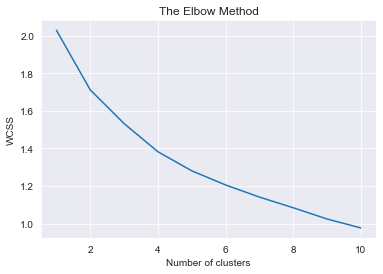

In [364]:
from sklearn.cluster import KMeans
wcss = [] # Within Cluster Sum Square/ Loss
for i in tqdm(range(1, 11)):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init = 10, \
             max_iter = 300, random_state = 0, n_jobs = -1)
    kmeans.fit(X_w2v)
    wcss.append(kmeans.inertia_)
    # n_init: For repeating KMeans++ for handling noise/ outliers
    # inertia: compute the sum of squares within the clusters
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### The no. of clusters we are getting using elbow-method is 3 

In [365]:
best_k = 3
kmeans = KMeans(n_clusters = best_k, init = 'k-means++', n_init = 10, \
         max_iter = 300, random_state = 0, n_jobs = -1)
Y_kmeans = kmeans.fit_predict(X_w2v)

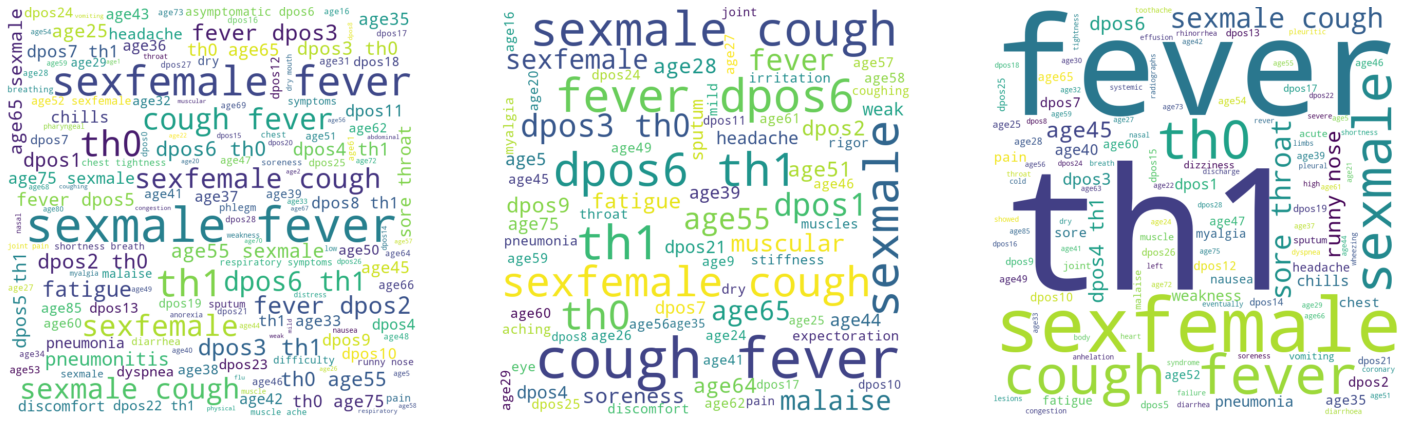

In [366]:
# Wordcloud, Souce; Geeksforgeeks
from wordcloud import WordCloud, STOPWORDS 
figure, axes = plt.subplots(1, 3, figsize = (25, 10))

top_words_str = " "
top_words_str = top_words_str.join(X[Y_kmeans == 0])
#stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(top_words_str) 
  
# plot the WordCloud image
plt.subplot(131)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

top_words_str = " "
top_words_str = top_words_str.join(X[Y_kmeans == 1])
#stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(top_words_str) 
  
plt.subplot(132)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")


top_words_str = " "
top_words_str = top_words_str.join(X[Y_kmeans == 2])
#stopwords = set(STOPWORDS) 

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                #stopwords = stopwords, 
                min_font_size = 10).generate(top_words_str) 
  
plt.subplot(133)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

# Conclusion :


__Final Categories:__ As you can see from the above word clouds of master-symptoms, We can simply approximately categorize the prone populations as:

***

__Category 3__ (Healthcare service-Priority): [Age between 30–75] + [fever, cough, respiratory, runny nose, sore throat, pneumonia, headache, chest tightness with dpos > 4] + [th-1 active travel histories mainly]

__Category 2__ (Test-Priority): [Age between 0–75] + [fever, cough, malaise, pneumonia, stiffness, joint, muscular soreness with dpos between 1–3] + [th-0/1 active or inactive travel histories]

__Category 1__ (Self-Quarantined): [Age between 0–75] + [fever, cough, weakness, diarrhea, dizziness, chills with dpos between 1–3] + [th-0 mostly inactive travel histories with some active travel histories also]

<div class="alert alert-block alert-info">
<b>Learning:</b> As we can see that the symptoms patterns (mixed symptoms) depends on age mainly in the case of COVID-19 and gets severe with dpos. My efforts were to detect these patterns only for prioritizing the testing using PbATS.
</div>